<a href="https://colab.research.google.com/github/ferdinann/Diagnosis_Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Instalasi dataset

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nanditapore/healthcare-diabetes
!unzip healthcare-diabetes.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes
License(s): apache-2.0
  0% 0.00/26.7k [00:00<?, ?B/s]
100% 26.7k/26.7k [00:00<00:00, 35.8MB/s]
Archive:  healthcare-diabetes.zip
  inflating: Healthcare-Diabetes.csv  


## Menampilkan 5 data terbawah

In [ ]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [ ]:
df.duplicated().sum()

0

## Menghapus kolom ID dan menampilkan informasi dari data

Karena kolom ID tidak memberikan pengaruh dan tidak akan digunakan dalam prediksi status diabetes maka kolom ID dihapus.


In [ ]:
df.drop('Id', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


## Mengecek jumlah data null dan unik

In [ ]:
print(df.isnull().sum())
print()
print(df.nunique())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     187
BMI                         253
DiabetesPedigreeFunction    523
Age                          52
Outcome                       2
dtype: int64


## Memilih kolom 'SkinThickness' jika nilai nya lebih besar dari 0 saja

kolom skinThickness atau ketebalan kulit yang digunakan adalah yang memiliki nilai lebih besar dari 0 saja karena tidak mungkin pasien memiliki ketebalan kulit 0 atau lebih kecil.

In [ ]:
df = df[df['SkinThickness'] > 0]

## Menampilkan deskripsi data

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,3.442581,119.962398,71.251016,29.289634,112.481707,32.944614,0.503031,31.443598,0.328760
std,3.291275,32.746234,13.181884,10.711518,118.619142,7.234602,0.339249,10.606512,0.469882
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,98.000000,64.000000,22.000000,0.000000,28.000000,0.260000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,90.000000,32.900000,0.419000,28.000000,0.000000
75%,5.000000,140.250000,80.000000,36.000000,165.000000,37.200000,0.655000,38.000000,1.000000
max,17.000000,199.000000,110.000000,110.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Menampilkan sample populasi dari data target dengan pie chart

In [ ]:
target_features = ['Outcome']

### Menampilkan distribusi data untuk melihat populasi pada target feature yaitu kolom 'Outcome'.

Dari pie chart yang ditampikan terlihat bahwa yang memliki status tidak diabetes(0) adalah 67% dan yang memiliki status diabetes(1) adalah 33% dengan jumlah sample 1321 dan 647

         jumlah sampel  persentase
Outcome                           
0                 1321        67.1
1                  647        32.9


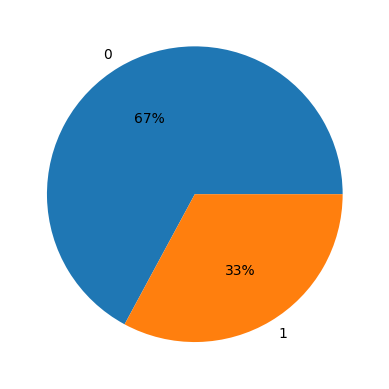

In [ ]:
feature = target_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dff = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dff)
plt.pie(dff['jumlah sampel'], labels=dff.index, autopct='%1.0f%%')
plt.show()

## Memvisualisasikan distribusi data dari semua kolom/feature pada dataset

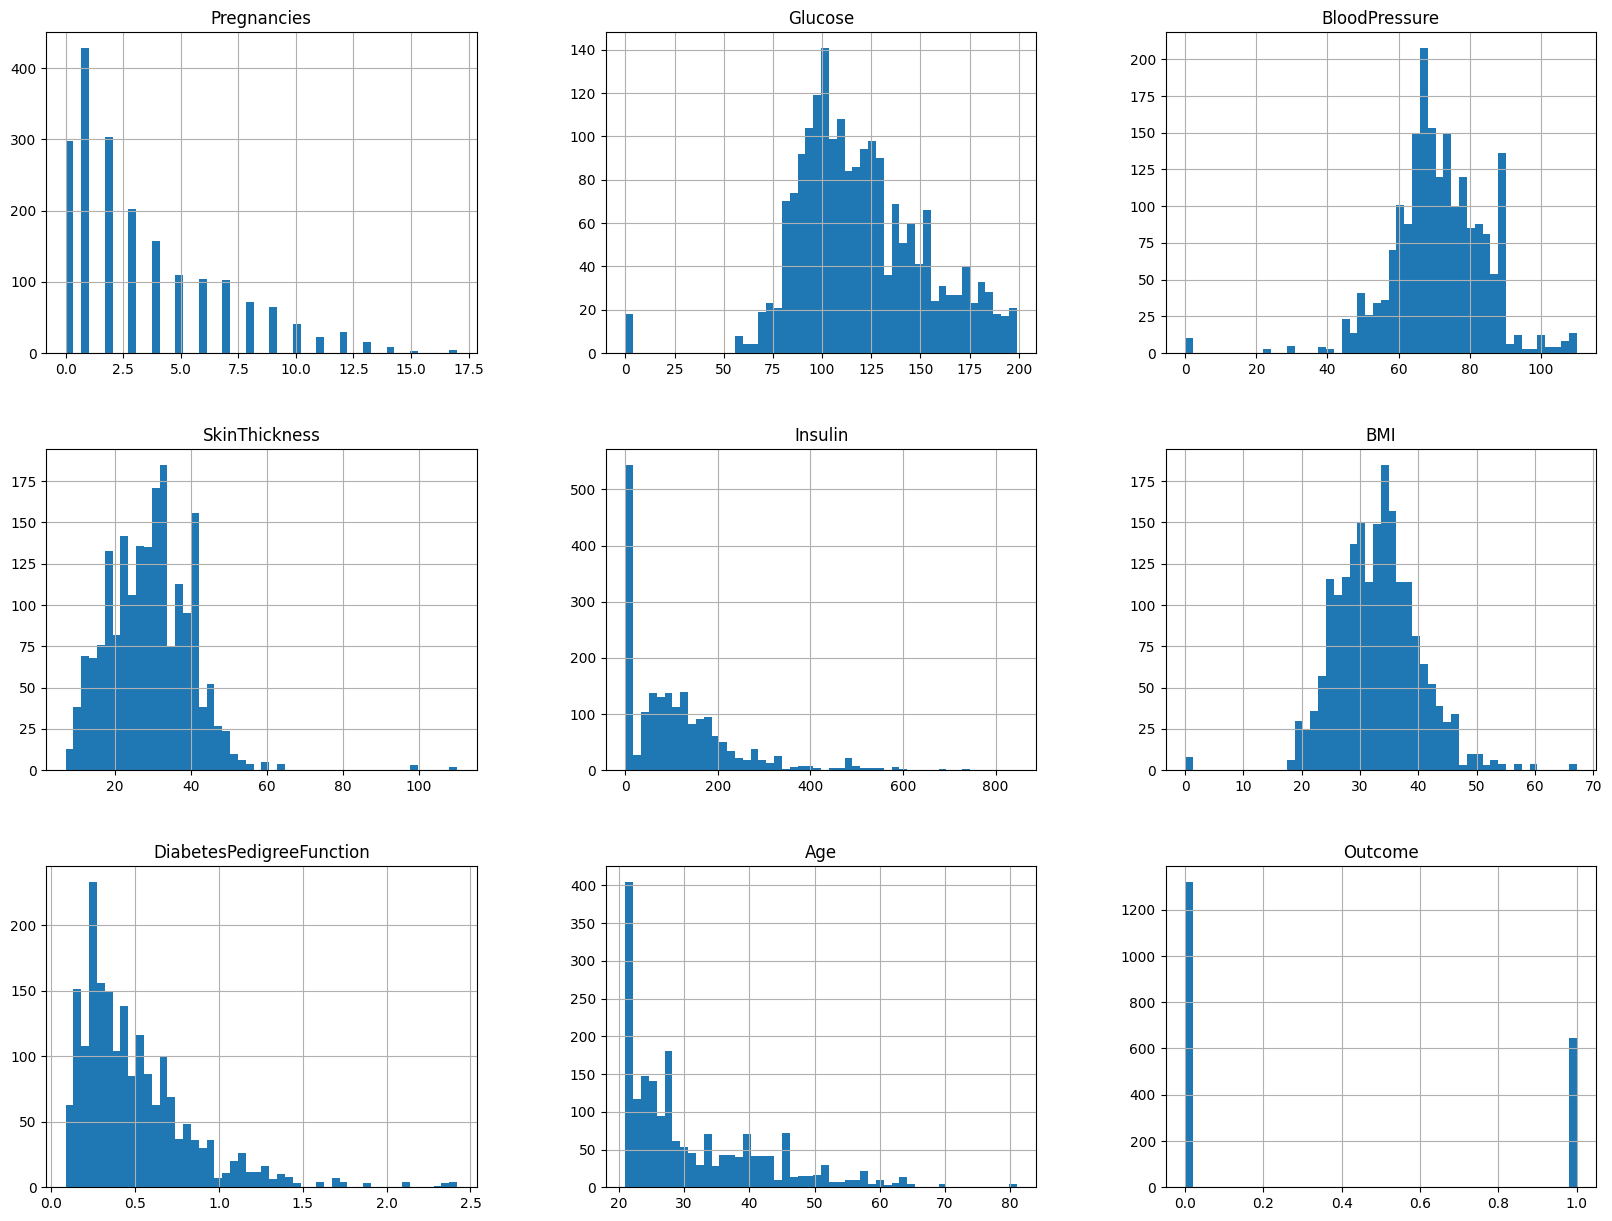

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Dari distribusi data diatas dapat dilihat perbandingan dari setiap nilai pada setiap kolom atau feature.

## Menganalisa outlier pada semua kolom di dataset

<Axes: xlabel='Outcome'>

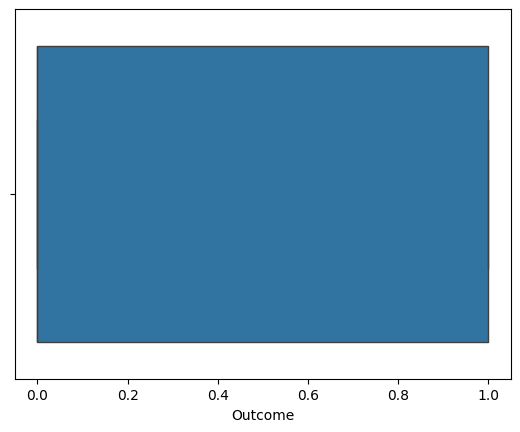

In [ ]:
sns.boxplot(x=df['Outcome'])

<Axes: xlabel='Age'>

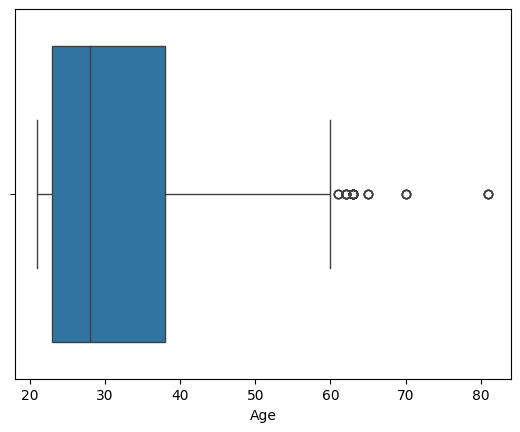

In [ ]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='BMI'>

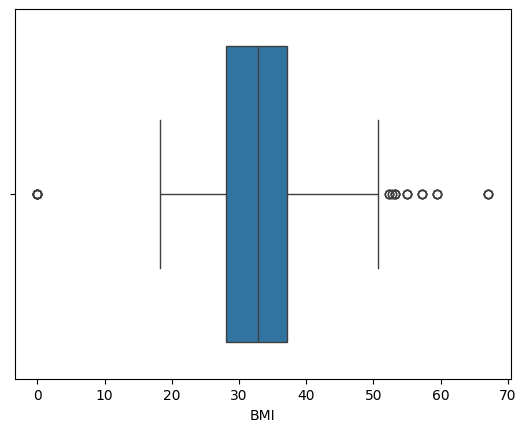

In [ ]:
sns.boxplot(x=df['BMI'])

<Axes: xlabel='Insulin'>

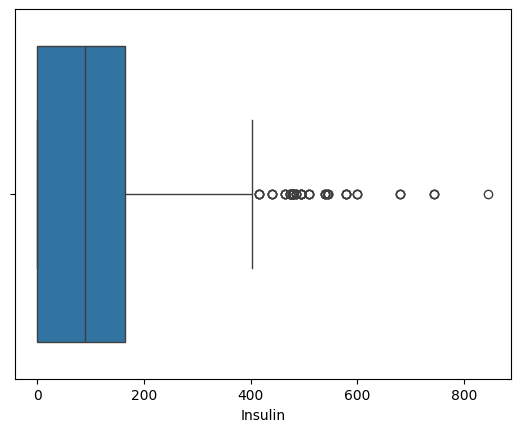

In [ ]:
sns.boxplot(x=df['Insulin'])

<Axes: xlabel='DiabetesPedigreeFunction'>

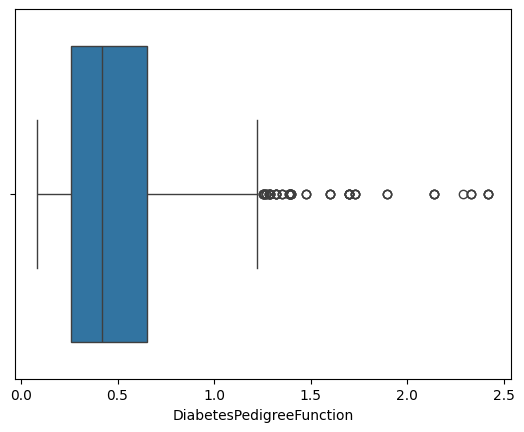

In [ ]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

<Axes: xlabel='Glucose'>

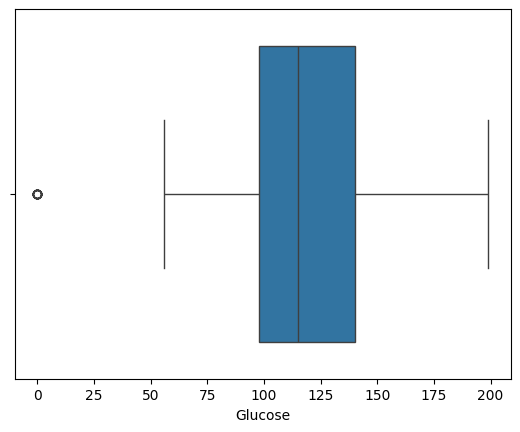

In [ ]:
sns.boxplot(x=df['Glucose'])

<Axes: xlabel='BloodPressure'>

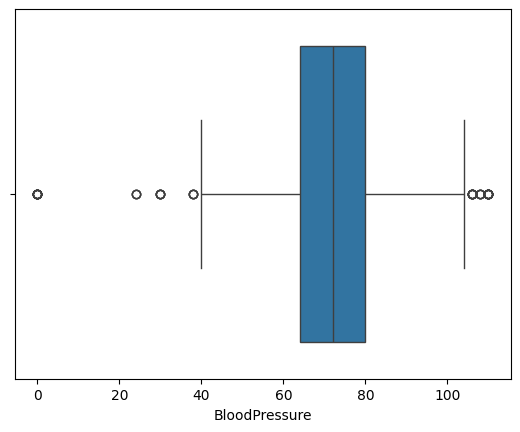

In [ ]:
sns.boxplot(x=df['BloodPressure'])

<Axes: xlabel='SkinThickness'>

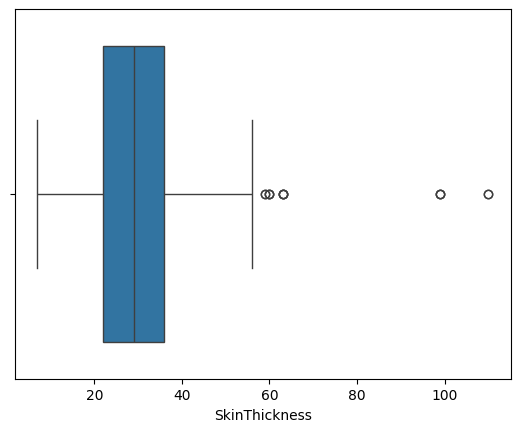

In [ ]:
sns.boxplot(x=df['SkinThickness'])

<Axes: xlabel='Pregnancies'>

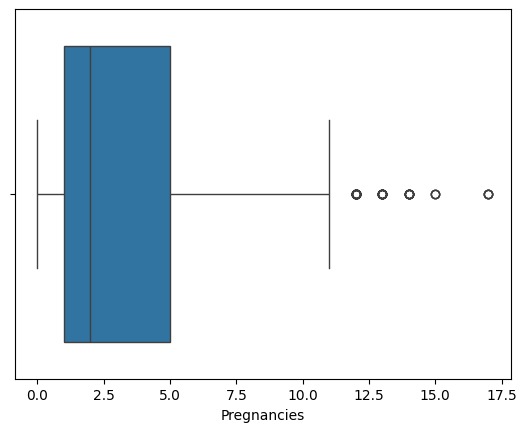

In [ ]:
sns.boxplot(x=df['Pregnancies'])

<Axes: xlabel='BloodPressure'>

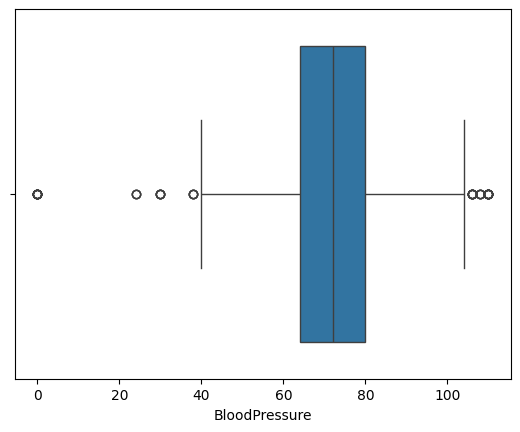

In [ ]:
sns.boxplot(x=df['BloodPressure'])

## Menghapus outlier pada dataset

setelah melihat banyaknya outlier yang ada pada setiap kolom diatas maka langkah selanjutnya yang dilakukan adalah menghapus outlier tersebut dengan menentukan batas atas dan batas bawah. Data yang melewati batas atas dan batas bawah akan dihapus.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape

(1669, 9)

### Menampilkan matriks plot untuk melihat hubungan antar variabel sehingga dapat dilihat pola korelasi antar variabel variabel tersebut.

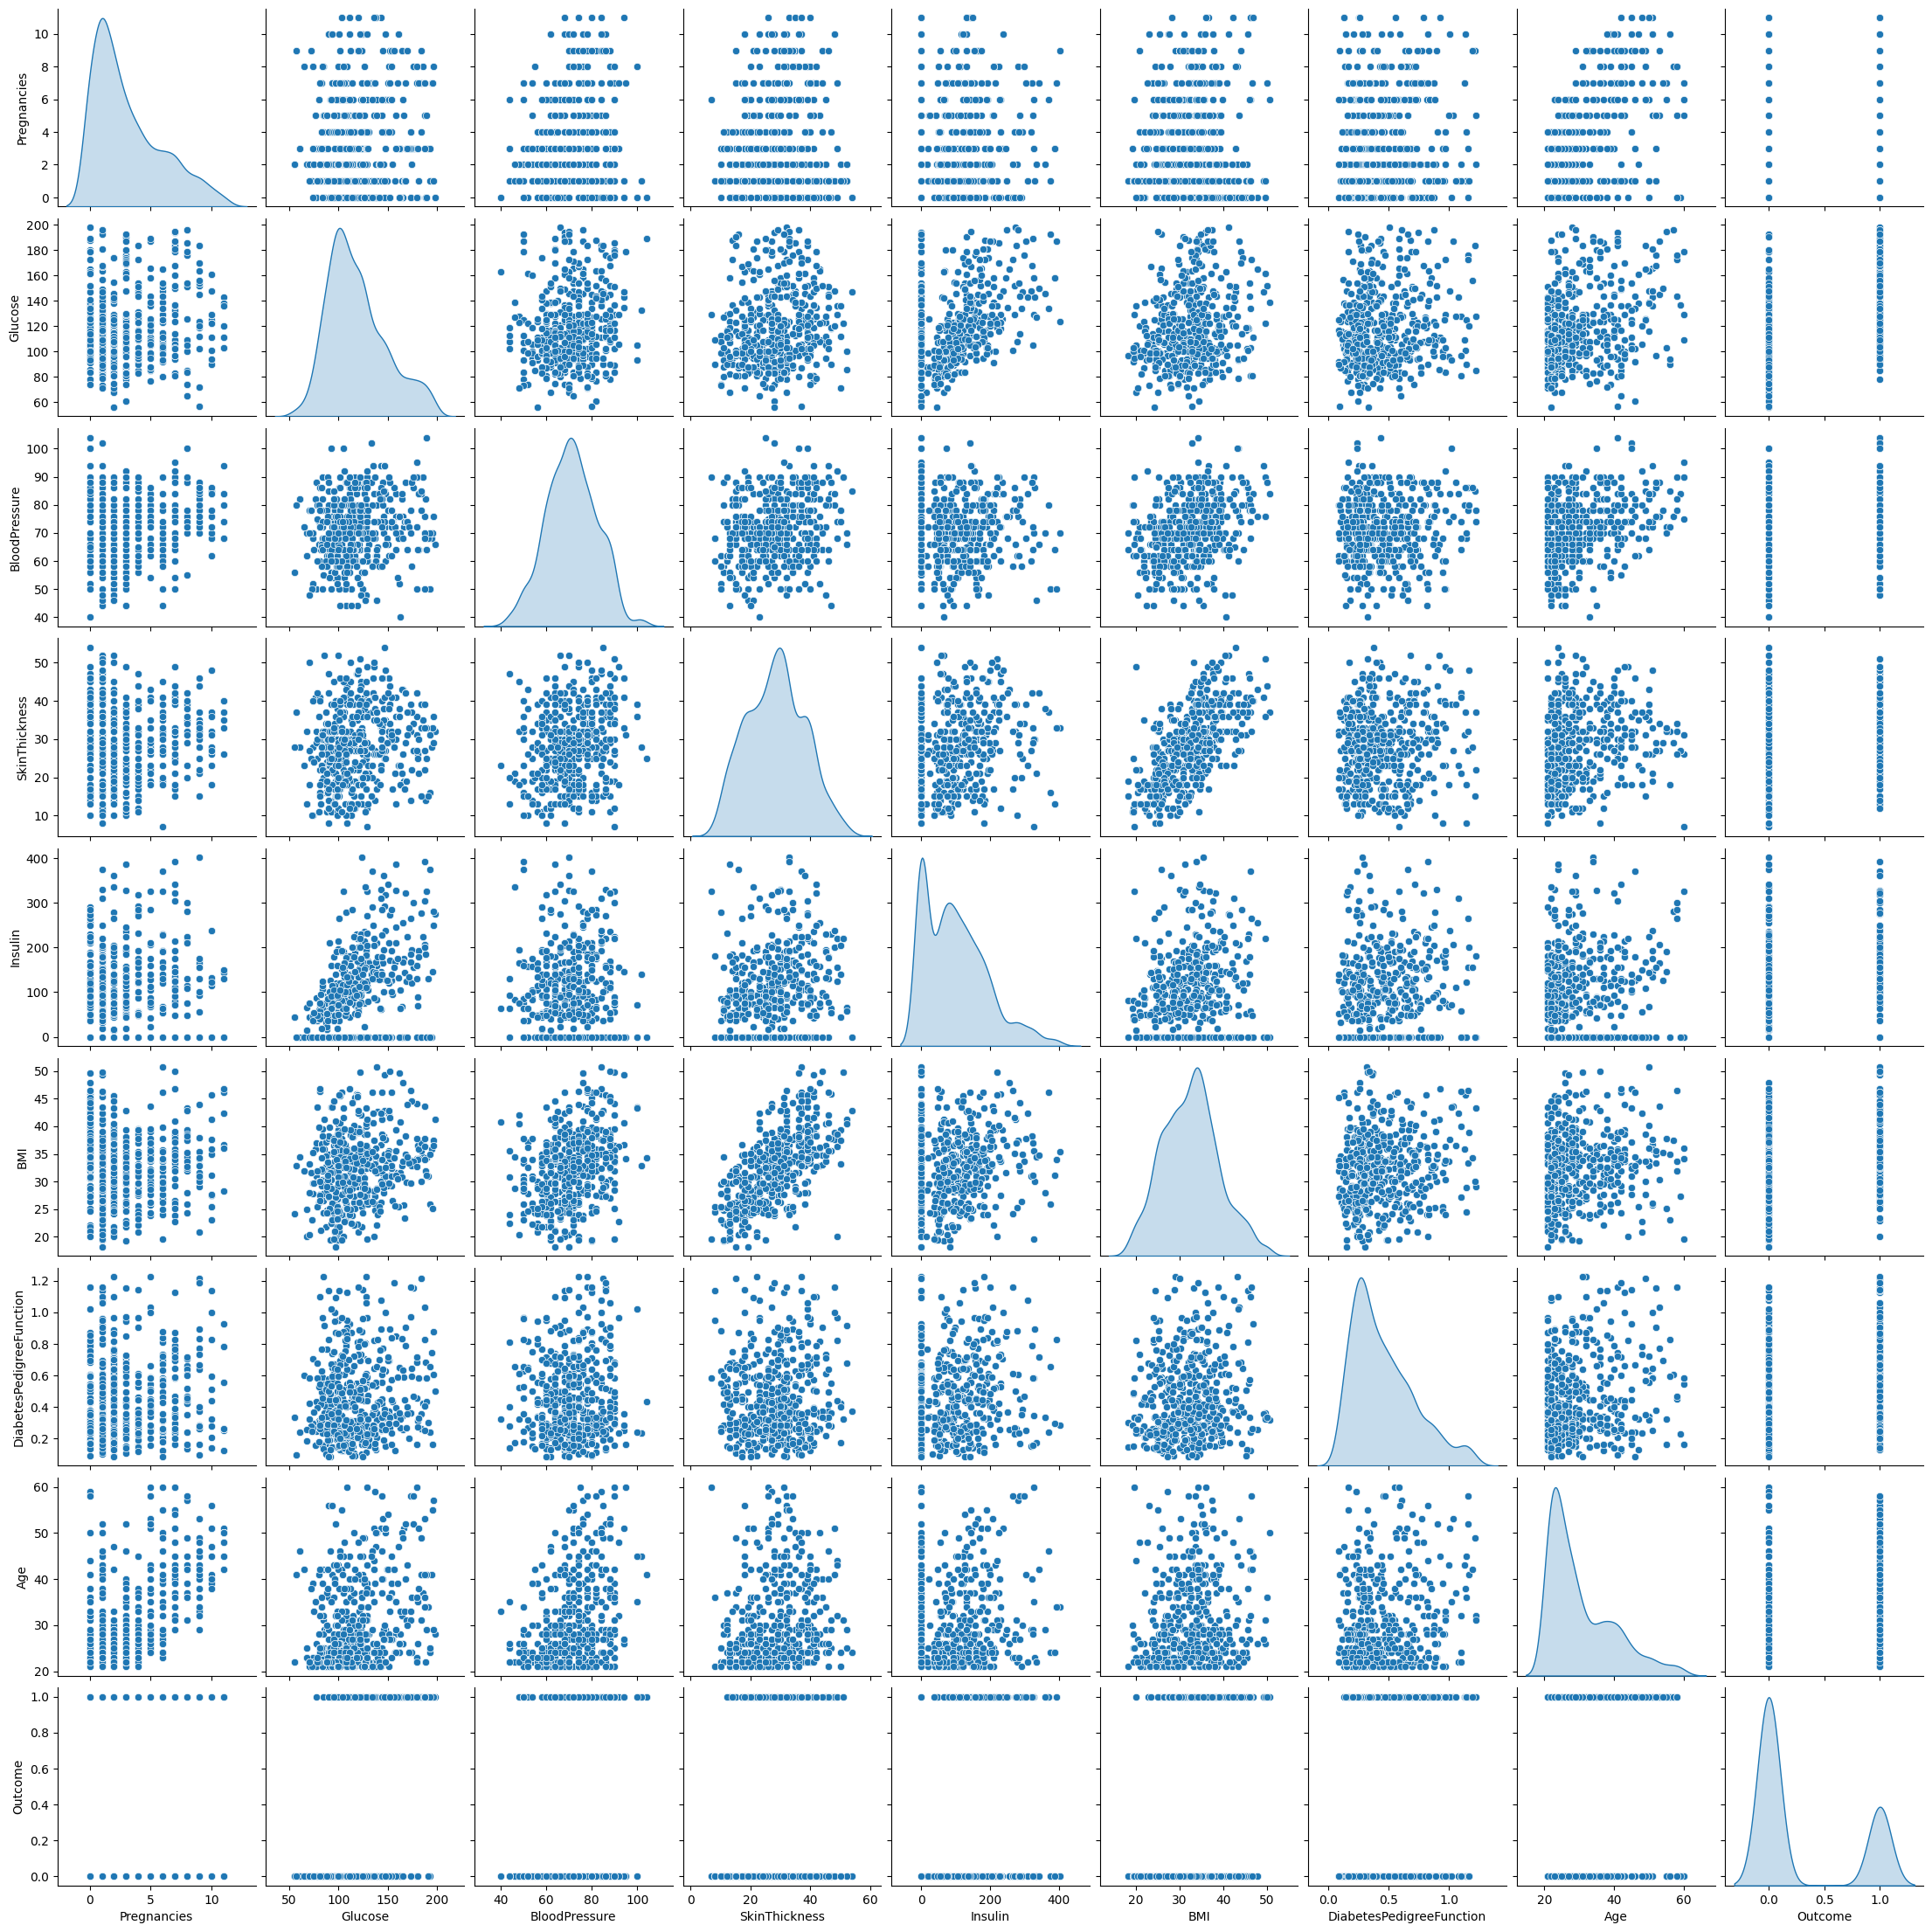

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

## Melihat korelasi atau hubungan antar variabel pada dataset
Membuat plot headmap Untuk memudahkan menganalisis korelasi antar variabel sehingga bisa melihat warna dan value untuk setiap variabel dengan warna mendekati merah dan value yang mendekati 1 yang berarti memiliki korelasi yang tinggi dan sebaliknya.

Text(0.5, 1.0, 'Correlation Matrix Fitur')

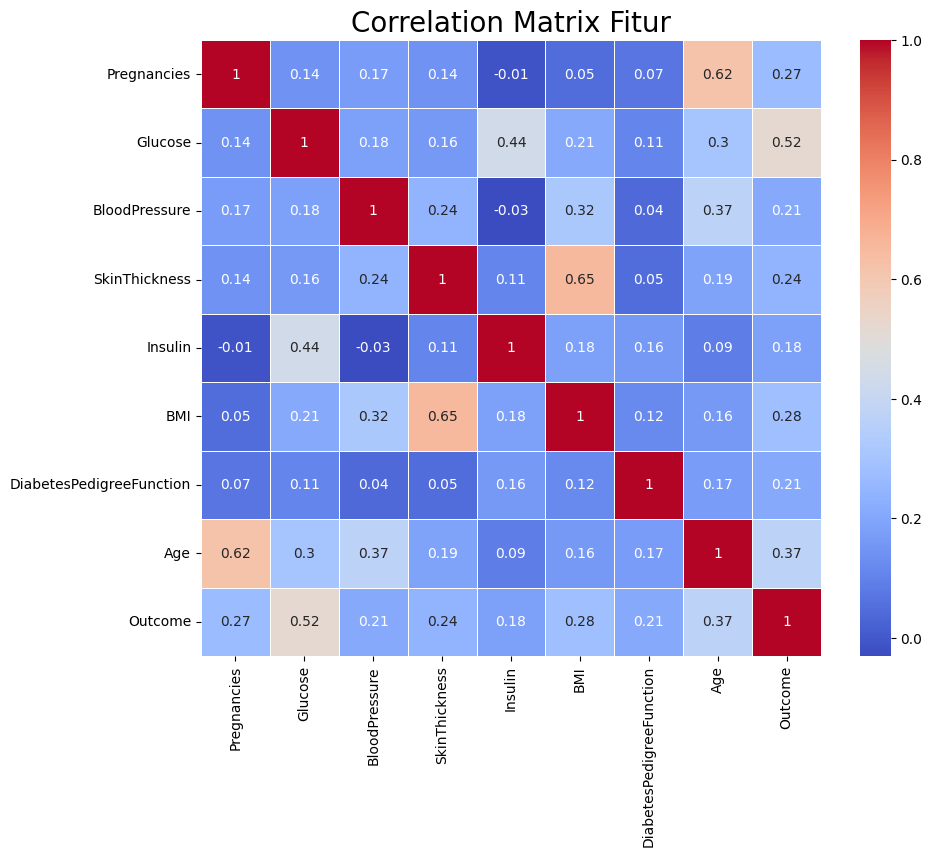

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix Fitur", size=20)

### Mengurutkan variabel yang memiliki korelasi paling tinggi sampai terendah dengan target feature yaitu 'Outcome'.

dari Plot headmap dapat dilihat bahwa feature glucose dan age yang memiliki korelasi paling tinggi dengan Outcome sedangkan feature insulin dan DiabetesPedegreeFuction yang memiliki korelasi terendah.

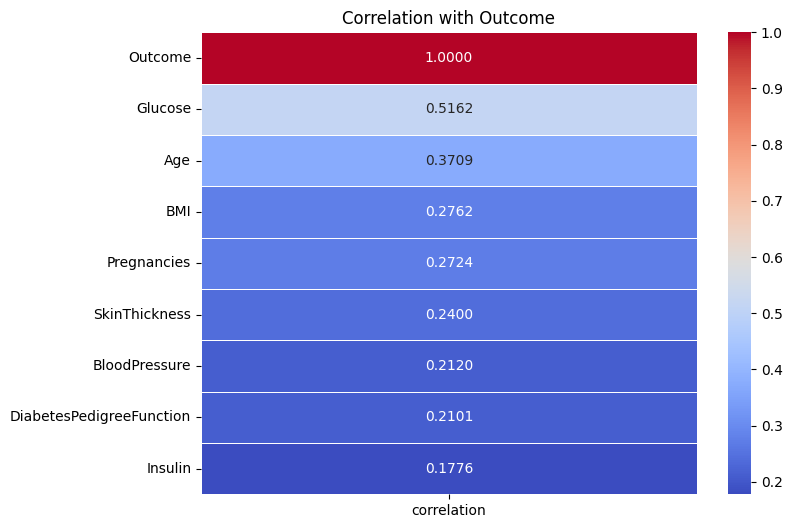

In [ ]:
corr = df.corrwith(df['Outcome']).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(corr , columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation with Outcome')
plt.show()

## Membagi dataset menjadi data training dan data testing

Membagi dataset dengan data training sebesar 90% dan data testing sebesar 10% dan sebelum itu kita juga memisahkan input feature dan target feature.  

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["Outcome"],axis =1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

### Menampilkan jumlah data yang sudah siap digunakan secara keseluruhan dengan jumlah sebesar 1651 lalu dibagi untuk data training dengan jumlah 1335 dan data testing dengan jumlah 334.

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1669
Total # of sample in train dataset: 1335
Total # of sample in test dataset: 334


## Mengstandarisasi dataset agar memiliki rentang nilai yang seragam

Hasil dari standarisasi ini nantinya adalah nilai mean mendekati 0 dan nilai std atau standart deviasi mendekati 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["Pregnancies",	"Glucose",	"BloodPressure",	"SkinThickness",	"Insulin",	"BMI",	"DiabetesPedigreeFunction", "Age"]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
2029,-0.759722,-1.281174,0.075924,-1.060194,-0.652421,-0.927633,-0.685961,-0.682617
1858,-0.759722,0.341434,0.972115,-1.162965,0.955657,-0.785845,-1.336879,-0.900682
1519,-0.759722,0.099769,0.613639,1.097992,-0.270081,1.025887,-0.771200,-0.246487
1832,-0.759722,-0.901415,-0.820266,-0.340799,-0.641176,-2.046180,0.085068,-0.573584
2519,2.109384,0.928335,0.792877,1.817387,0.359656,0.852591,0.685618,1.061903


### Menampilkan Deskripsi dari data training yang sudah di standarisasi dengan harapan output adalah mean mendekati 0 dan std mendekati 1

In [ ]:
X_train[numerical_features].describe().round(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,1335.0000,1335.0000,1335.0000,1335.0000,1335.0000,1335.0000,1335.0000,1335.0000
mean,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004
min,-1.1184,-2.1443,-2.7919,-2.1907,-1.1022,-2.2510,-1.4531,-1.0097
25%,-0.7597,-0.7288,-0.6410,-0.7519,-1.1022,-0.7386,-0.7828,-0.7916
50%,-0.4011,-0.2109,-0.1033,-0.0325,-0.1464,0.0334,-0.2210,-0.3555
75%,0.6748,0.6176,0.6136,0.7897,0.6408,0.6163,0.5965,0.6258
max,2.8267,2.7581,2.9437,2.6396,3.3059,2.8691,2.9600,3.2426


## Membuat variabel models untuk menyimpan mean squared error dari model yang dibuat

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse',],
                      columns=['KNN', 'RandomForest', 'Boosting','SVM', 'XGB', 'DT'])

## Model klassifikasi dengan KNN

tahapan yang dilakukan pada pembuatan model ini sangat sederhana yaitu :
1. mengimport library
2. menginisialisasi variabel untuk menampung algoritma model
3. melatih model
4. menyimpan fungsi kerugian ke dalam variabel models yang telah dibuat sebelumnya.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Model klassifikasi dengan Random Forest
tahapan yang dilakukan pada pembuatan model ini sangat sederhana yaitu :
1. mengimport library
2. menginisialisasi variabel untuk menampung algoritma model
3. melatih model
4. menyimpan fungsi kerugian ke dalam variabel models yang telah dibuat sebelumnya.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=40, max_depth=16, random_state=32, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Model klassifikasi dengan Gradient Boosting
tahapan yang dilakukan pada pembuatan model ini sangat sederhana yaitu :
1. mengimport library
2. menginisialisasi variabel untuk menampung algoritma model
3. melatih model
4. menyimpan fungsi kerugian ke dalam variabel models yang telah dibuat sebelumnya.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(random_state=42,n_estimators=100,learning_rate=0.2)
boosting.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Model klassifikasi dengan SVM
tahapan yang dilakukan pada pembuatan model ini sangat sederhana yaitu :
1. mengimport library
2. menginisialisasi variabel untuk menampung algoritma model
3. melatih model
4. menyimpan fungsi kerugian ke dalam variabel models yang telah dibuat sebelumnya.

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

models.loc['train_mse','SVM'] = mean_squared_error(y_pred=svm.predict(X_train), y_true=y_train)

## Model klassifikasi dengan XGB
tahapan yang dilakukan pada pembuatan model ini sangat sederhana yaitu :
1. mengimport library
2. menginisialisasi variabel untuk menampung algoritma model
3. melatih model
4. menyimpan fungsi kerugian ke dalam variabel models yang telah dibuat sebelumnya.

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

models.loc['train_mse','XGB'] = mean_squared_error(y_pred=xgb.predict(X_train), y_true=y_train)

## Model klassifikasi dengan Decision Tree
tahapan yang dilakukan pada pembuatan model ini sangat sederhana yaitu :
1. mengimport library
2. menginisialisasi variabel untuk menampung algoritma model
3. melatih model
4. menyimpan fungsi kerugian ke dalam variabel models yang telah dibuat sebelumnya.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=20)
DT.fit(X_train , y_train)

models.loc['train_mse','DT'] = mean_squared_error(y_pred=DT.predict(X_train), y_true=y_train)

## Model klassifikasi dengan Tensorflow (Neural Network)
tahapan yang dilakukan pada pembuatan model neural network ini cukup sederhana yaitu :
1. mengimport library
2. membuat variabel model untuk menampung fungsi sequential
3. menambahkan lapisan input dengan
4. menambahkan fungsi dropout untuk menghindari overfitting
5. menambahkan lapisan padat dengan jumlah neuron 32
6. menambahkan fungsi batch normalization
7. menambahkan lapisan padat lagi
8. menambahkan lapisan output dengan activation sigmoid
9. melatih model
10. mengevaluasi model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

TF = Sequential()

TF.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
TF.add(Dropout(0.5))
TF.add(Dense(32, activation='relu'))
TF.add(BatchNormalization())
TF.add(Dense(16, activation='relu'))
TF.add(Dense(1, activation='sigmoid'))

TF.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

TF.summary()

history = TF.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

test_loss, test_acc = TF.evaluate(X_train, y_train)
print(f'Test Accuracy: {test_acc*100:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6573 - loss: 0.6447 - val_accuracy: 0.7836 - val_loss: 0.5709
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7341 - loss: 0.5089 - val_accuracy: 0.7910 - val_loss: 0.5263
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7563 - loss: 0.4815 - val_accuracy: 0.7537 - val_loss: 0.4997
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7763 - loss: 0.4386 - val_accuracy: 0.7537 - val_loss: 0.4778
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8065 - loss: 0.4337 - val_accuracy: 0.7463 - val_loss: 0.4670
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7953 - loss: 0.4264 - val_accuracy: 0.7463 - val_loss: 0.4576
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7702 - loss: 0.4268 - val_accuracy: 0.7463 - val_loss: 0.4537
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8031 - loss: 0.4176 - val_accuracy: 0.7537 - val_loss:

## Membuat scalar untuk X_test

Ini diperlukan agar data latih memiliki skala nilai yang normal sehingga hasil prediksi dapat lebih optimal

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-38-0615151fc0c1>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.10938386 -0.75972205 -0.40108381 -1.11836029 -0.75972205  1.39210738
  2.10938386 -0.40108381 -0.40108381 -0.40108381 -0.40108381  1.03346914
  0.31619266 -0.75972205 -1.11836029 -0.40108381  0.31619266 -0.75972205
  1.75074562 -1.11836029 -0.75972205 -1.11836029  2.82666033  1.39210738
 -0.75972205 -0.40108381  2.10938386 -1.11836029  1.39210738 -1.11836029
 -0.40108381 -0.04244557 -1.11836029  2.10938386 -0.40108381 -0.75972205
  2.10938386 -0.75972205 -0.40108381 -0.40108381 -0.40108381  1.03346914
  0.31619266  1.75074562  1.39210738 -1.11836029 -0.40108381 -1.11836029
 -0.04244557 -0.75972205 -1.11836029  1.39210738 -0.75972205 -0.75972205
 -0.04244557 -0.75972205 -0.40108381 -0.75972205  0.6748309  -1.11836029
  1.39210738 -0.40108381 -0.40108381 -1.11836029  2.10938386 -1.11836029
  0.31619266  0.31619266 -0.40108381 -1.1183

## Menampilkan loss fuction untuk model yang telah dibuat untuk melihat model dengan performa terbaik
Dari dataframe yang ditampilkan dapat dilihat performa dari setiap model yang telah dibuat, semakin kecil nilai yang ditampikan maka semakin baik performa model.

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting', 'SVM', 'XGB', 'DT'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting, 'SVM': svm, 'XGB': xgb, 'DT':DT}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1

mse.loc['TF', 'train'] = mean_squared_error(y_true=y_train, y_pred=TF.predict(X_train))/1
mse.loc['TF', 'test'] = mean_squared_error(y_true=y_test, y_pred=TF.predict(X_test))/1

# Panggil mse
mse

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,train,test
KNN,0.094382,0.149701
RF,0.0,0.011976
Boosting,0.005243,0.026946
SVM,0.11985,0.140719
XGB,0.0,0.002994
DT,0.0,0.008982
TF,0.098037,0.101657


## Evaluasi model

Melihat performa model dengan beberapa metrik untuk melihat akurasi dan keakuratan model yang telah dibuat semakin tinggi nilai atau mendekati 1 maka performa model semakin baik.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = pd.DataFrame(columns=['test_accuracy', 'test_precision',
                               'test_recall', 'test_f1'],
                       index=['KNN','RF','Boosting', 'SVM', 'XGB', 'DT'])

for name, model in model_dict.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics.loc[name, 'test_accuracy'] = accuracy_score(y_test, y_test_pred)
    metrics.loc[name, 'test_precision'] = precision_score(y_test, y_test_pred)
    metrics.loc[name, 'test_recall'] = recall_score(y_test, y_test_pred)
    metrics.loc[name, 'test_f1'] = f1_score(y_test, y_test_pred)

# Tambahkan baris untuk model TensorFlow
y_test_pred_tf = (TF.predict(X_test) > 0.67).astype(int)  # Konversi ke binary

metrics.loc['TF', 'test_accuracy'] = accuracy_score(y_test, y_test_pred_tf)
metrics.loc['TF', 'test_precision'] = precision_score(y_test, y_test_pred_tf)
metrics.loc['TF', 'test_recall'] = recall_score(y_test, y_test_pred_tf)
metrics.loc['TF', 'test_f1'] = f1_score(y_test, y_test_pred_tf)

metrics


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,test_accuracy,test_precision,test_recall,test_f1
KNN,0.850299,0.793478,0.701923,0.744898
RF,0.988024,0.962963,1.0,0.981132
Boosting,0.973054,0.952381,0.961538,0.956938
SVM,0.859281,0.827586,0.692308,0.753927
XGB,0.997006,0.990476,1.0,0.995215
DT,0.991018,0.971963,1.0,0.985782
TF,0.838323,0.878788,0.557692,0.682353


### Untuk mempermudah proses analisis tampilkan plot atau grafik untuk melihat perbedaan loss functions setiap model. Semakin kecil nilai maka semakin baik.

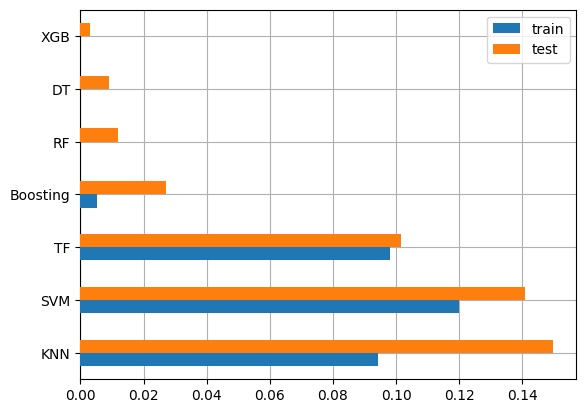

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## Prediksi diabetes dengan data test

Menampilkan 10 data pertama saja dari data test untuk melakukan prediksi dan 10 data pertama untuk target feature yang sebenarnya. Selanjutnya membuat perulangan untuk setiap model dan menampilkan nya dalam dataframe untuk mempermudah analisis kualitas model.

prediksi model tensorflow dibuat dengan threshold 0.67 karena mayoritas target feature adalah 67% bernilai 0.

In [ ]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pred_dict['prediksi_TF'] = (TF.predict(prediksi) > 0.67).astype(int).reshape(-1).round(1)

pd.DataFrame(pred_dict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_SVM,prediksi_XGB,prediksi_DT,prediksi_TF
1013,1,1,1,1,1,1,1,1
639,0,0,0,0,0,0,0,0
1816,0,0,0,0,0,0,0,0
2328,0,0,0,0,0,0,0,0
1455,0,0,0,0,0,0,0,0
1053,0,0,0,0,0,0,0,0
2171,1,1,1,1,1,1,1,1
1528,0,0,0,0,0,0,0,0
1468,0,0,0,0,0,0,0,0
1475,0,0,0,0,0,0,0,0
